In [ ]:
"""
The relevance of deep learning for small-data problems


1. You’ll sometimes hear that deep learning only works when lots of data is available. This is valid in part: one fundamental characteristic
   of deep learning is that it can find interesting features in the training data on its own, without any need for manual feature engineering,
   and this can only be achieved when lots of training examples are available. This is especially true for problems where the input samples
   are very highdimensional, like images.

2. But what constitutes lots of samples is relative — relative to the size and depth of the network you’re trying to train, for starters.
   It isn’t possible to train a convnet to solve a complex problem with just a few tens of samples, but a few hundred can potentially
   suffice if the model is small and well regularized and the task is simple. Because convnets learn local, translation-invariant features,
   they’re highly data efficient on perceptual problems. Training a convnet from scratch on a very small image dataset will still yield
   reasonable results despite a relative lack of data, without the need for any custom feature engineering.

3. The deep-learning models are by nature highly repurposable: you can take, say, an image-classification or speech-to-text model trained
   on a large-scale dataset and reuse it on a significantly different problem with only minor changes. Specifically in the case of computer
   vision, many pretrained models (usually trained on the ImageNet dataset) are now publicly available for download and can be used to
   bootstrap powerful vision models out of very little data.
"""

In [6]:
# Prepare data
import os, shutil

# base
original_dataset_dir = '/data/home/zhangmu/workspace/workspace_python/keras_learning_workspace/data/original_dogs_cats/'
base_dir = '/data/home/zhangmu/workspace/workspace_python/keras_learning_workspace/data/small_cat_dog'
os.mkdir(base_dir)

# train, valid and test
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# rain, valid and test data for cat and dog
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# copy the first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# copy the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# copy the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# copy the first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# copy the next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# copy the next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# sanity check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [7]:
# Build & compile the model
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [10]:
"""
Data Preprocessing

1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval 
"""
from keras.preprocessing.image import ImageDataGenerator

# Quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [15]:
# Fittomg the model using a batched generator
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

# Save the model
model.save('./model/cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 8s 81ms/step - loss: 0.6871 - acc: 0.5520 - val_loss: 0.6736 - val_acc: 0.5540
Epoch 2/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6565 - acc: 0.6115 - val_loss: 0.6688 - val_acc: 0.5790
Epoch 3/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6097 - acc: 0.6705 - val_loss: 0.6598 - val_acc: 0.5910
Epoch 4/30
100/100 [==============================] - 5s 53ms/step - loss: 0.5715 - acc: 0.6950 - val_loss: 0.6616 - val_acc: 0.6180
Epoch 5/30
100/100 [==============================] - 5s 54ms/step - loss: 0.5419 - acc: 0.7150 - val_loss: 0.6105 - val_acc: 0.6570
Epoch 6/30
100/100 [==============================] - 5s 53ms/step - loss: 0.5213 - acc: 0.7395 - val_loss: 0.5755 - val_acc: 0.6890
Epoch 7/30
100/100 [==============================] - 5s 54ms/step - loss: 0.4837 - acc: 0.7740 - val_loss: 0.6020 - val_acc: 0.6840
Epoch 8/30
100/100 [==============================] - 5s 53ms/step - 

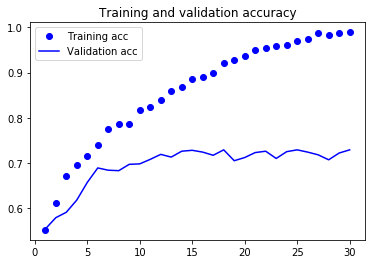

In [17]:
# Display curves of accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

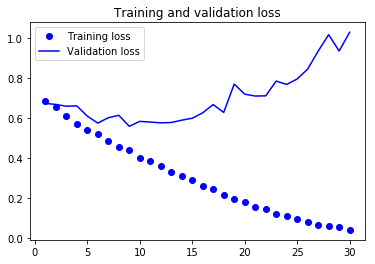

In [18]:
# Display curves of loss during training
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

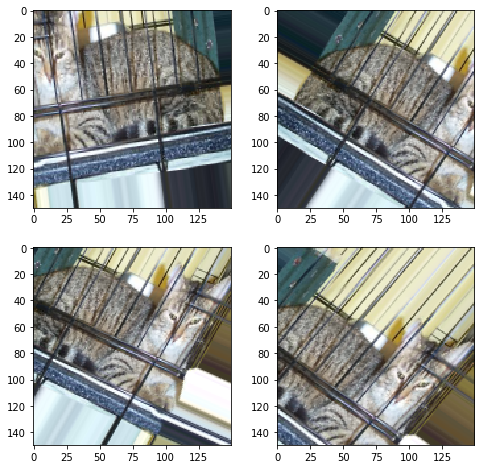

In [34]:
"""
Data Augmentation

Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data.
Given infinite data, your model would be exposed to every possible aspect of the data distribution at hand: you would never overfit. Data
augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number
of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact
same picture twice. This helps expose the model to more aspects of the data and generalize better.
"""
from keras.preprocessing import image

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[5]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 221
plt.figure(figsize=(8,8))
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 225:
        break

plt.show()

In [35]:
"""
Note: if you train a new network using this data-augmentation configuration, the network will never see the same input twice.
But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images—you can’t produce
new information, you can only remix existing information. As such, this may not be enough to completely get rid of overfitting. To
further fight overfitting, you’ll also add a Dropout layer to your model, right before the densely connected classifier.
"""

# Define a new model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


# Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 20s 197ms/step - loss: 0.6935 - acc: 0.5062 - val_loss: 0.6909 - val_acc: 0.5133
Epoch 2/100
100/100 [==============================] - 18s 180ms/step - loss: 0.6805 - acc: 0.5697 - val_loss: 0.6951 - val_acc: 0.5102
Epoch 3/100
100/100 [==============================] - 18s 178ms/step - loss: 0.6687 - acc: 0.5906 - val_loss: 0.6627 - val_acc: 0.5990
Epoch 4/100
100/100 [==============================] - 18s 181ms/step - loss: 0.6521 - acc: 0.6141 - val_loss: 0.6892 - val_acc: 0.5679
Epoch 5/100
100/100 [==============================] - 18s 177ms/step - loss: 0.6430 - acc: 0.6241 - val_loss: 0.6175 - val_acc: 0.6447
Epoch 6/100
100/100 [==============================] - 19s 194ms/step - loss: 0.6278 - acc: 0.6481 - val_loss: 0.5923 - val_acc: 0.6834
Epoch 7/100
100/100 [==============================] - 18s 183ms/step - loss: 0.6026 - acc: 0.6766 -

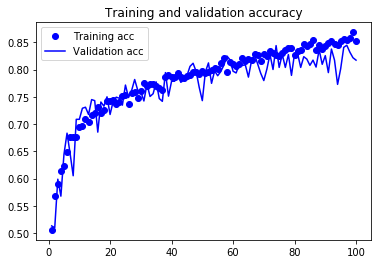

In [36]:
model.save('cats_and_dogs_small_2.h5')

# Display curves of accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

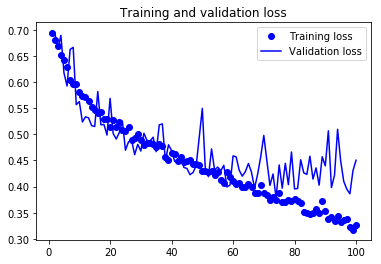

In [37]:
# Display curves of loss during training
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()